<a href="https://colab.research.google.com/github/vennelakantekar/CodSoft_Sales_Prediction_Using_Python/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import pylab as p
import statsmodels.api as sm

In [4]:
sales =pd.read_csv('advertising.csv')
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [38]:
print("skewness")
print("TV")
print(round(skew(sales.TV, axis=0, bias=True),5))
print("Radio")
print(round(skew(sales.Radio, axis=0, bias=True),5))
print("Newspaper")
print(round(skew(sales.Newspaper, axis=0, bias=True),5))
print("Sales")
print(round(skew(sales.Sales, axis=0, bias=True),5))

skewness
TV
-0.06933
Radio
0.09347
Newspaper
0.888
Sales
-0.07319


In [12]:
print("Kurtosis")
print("TV")
print(round(kurtosis(sales.TV, axis=0, bias=True),4))
print("Radio")
print(round(kurtosis(sales.Radio, axis=0, bias=True),4))
print("Newspaper")
print(round(kurtosis(sales.Newspaper, axis=0, bias=True),4))
print("Sales")
print(round(kurtosis(sales.Sales, axis=0, bias=True),4))

Kurtosis
TV
-1.2259
Radio
-1.259
Newspaper
0.6035
Sales
-0.654


In [13]:
sales.isnull().sum()*100/sales.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

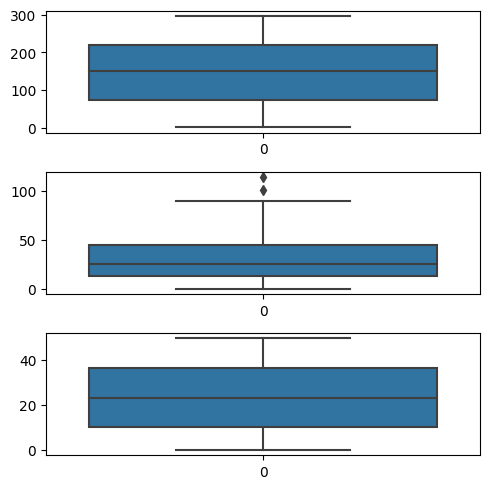

In [14]:
fig, axs = plt.subplots(3, figsize =(5,5))
plt1=sns.boxplot(sales['TV'],ax=axs[0])
plt2=sns.boxplot(sales['Newspaper'],ax=axs[1])
plt3=sns.boxplot(sales['Radio'],ax=axs[2])
plt.tight_layout()

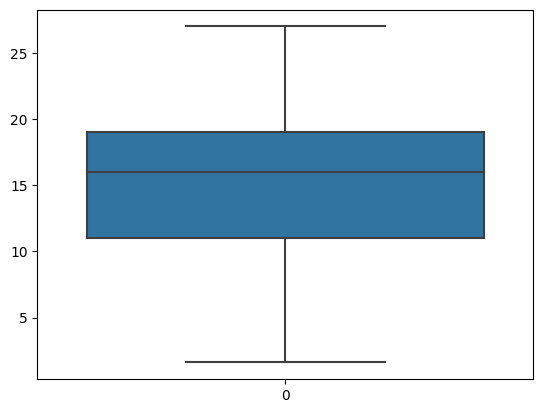

In [35]:
sns.boxplot(sales['Sales'])
plt.show()

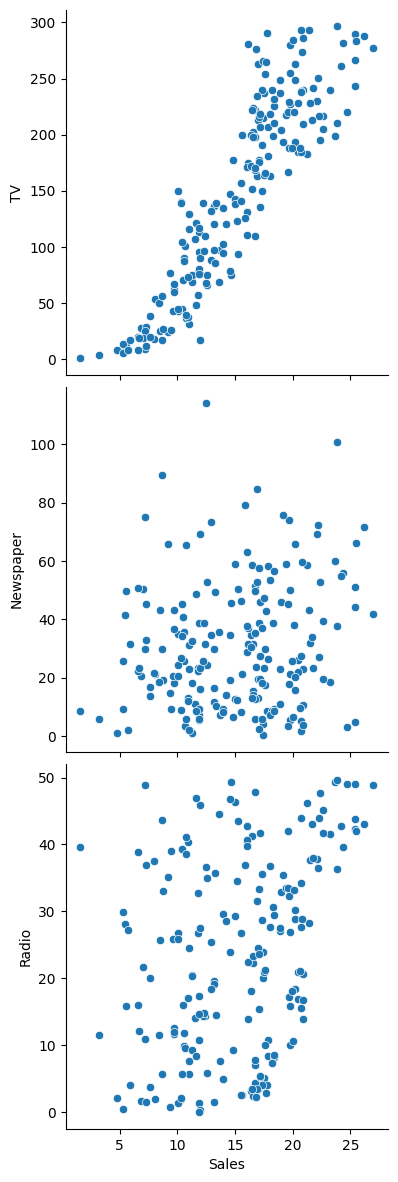

In [16]:
sns.pairplot(sales, y_vars=['TV', 'Newspaper', 'Radio'],x_vars='Sales',height=4,aspect=1, kind='scatter')
plt.show()

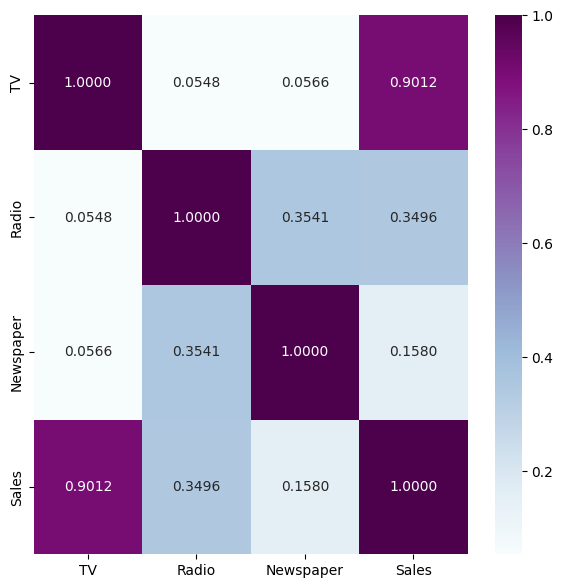

In [20]:
plt.figure(figsize=(7,7))
sns.heatmap(sales.corr(), cmap="BuPu",annot=True,fmt='.4f')
plt.show()

In [21]:
x=sales['TV']
y=sales['Sales']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [25]:
y_train.head(10)

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
127    11.9
81     17.3
88     12.9
119     6.6
110    18.4
Name: Sales, dtype: float64

In [26]:
x_train.head(10)

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
127     80.2
81     239.8
88      88.3
119     19.4
110    225.8
Name: TV, dtype: float64

In [31]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

In [28]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        10:32:38   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

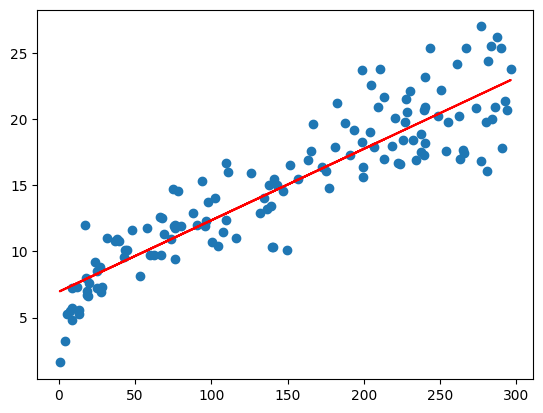

In [33]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948+0.054*x_train,'r')
plt.show()